# **Análise e exploração de dados de crédito com SQL**


# Colunas:

**As colunas representam dados de clientes de um banco separados por categorias:**

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartão do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de crédito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em:
[https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset](http://)

Todas as imagens estão disponíveis em: https://github.com/GustavoAnunciacao/SQL

***ps.:*** A base de dados do link acima contém mais linhas do que a seleção utilizada. Na prática, quanto maior a quantidade de dados utilizada, mais confiável a análise! Mas existem limites computacionais e financeiros na qual a redução de dados para análise se torna interessante.

# Exploração de dados:
A primeira etapa é compreender o que está disponível em nossa base de dados para, então, analisarmos como agregar valor ao banco. A query - um comando ou conjunto de instruções escritas em SQL - será usada para descobrir quantas pessoas têm seus dados registrados na base.

**Qual a quantidade clientes?**

**Query:** SELECT COUNT(*) AS numero_clientes FROM credito;

![](https://github.com/GustavoAnunciacao/SQL/blob/main/numeros_clientes.png?raw=true)

* Agora que sabemos qual é a quantidade de clientes, podemos ter uma noção da quantidade de informações com que vamos lidar.

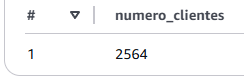
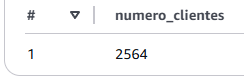
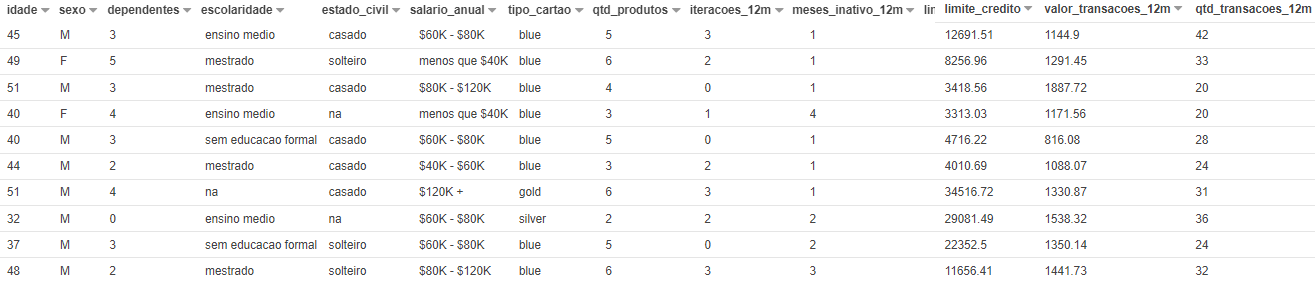
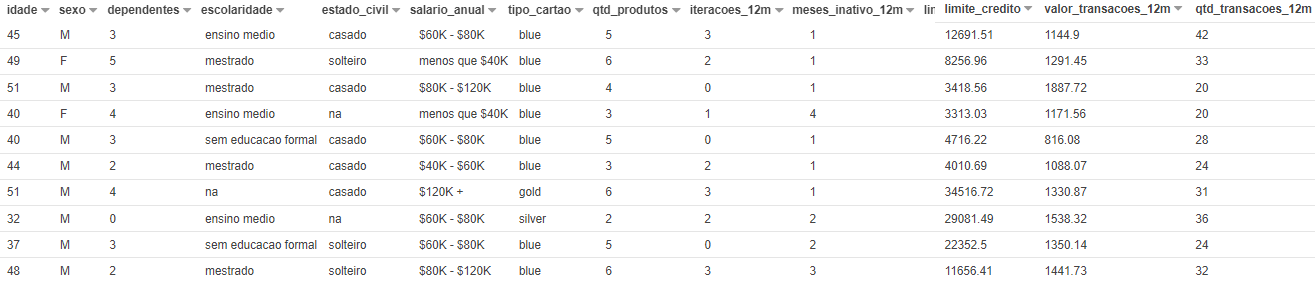

**Quais os tipos de dados?**
* Para evitar qualquer tipo de erro de compatibilidade durante a análise, vamos descobrir quais os tipos de dados de cada uma das colunas:

**Query:** DESCRIBE credito

![](https://github.com/GustavoAnunciacao/SQL/blob/main/describe.png?raw=true)

**Consequências de Ignorar os Tipos de dados:**
* Problemas de desempenho: Consultas lentas ou travamentos.
* Dados corrompidos: Valores truncados ou inválidos.
* Falhas em aplicações: Erros ao converter tipos incompatíveis.

**Quais são as faixas salariais presentes na base de dados?**
  
**Query:** SELECT DISTINCT salario_anual FROM credito

![](https://github.com/GustavoAnunciacao/SQL/blob/main/faixa_salarial.png?raw=true)

* É essencial compreendermos qual o nível do poder aquisitivo dos clientes, para futuramente checarmos se não há nenhuma descrepância entre o salário e o limite de crédito ou o tipo do cartão.

***ps:*** (na) corresponde aos clientes que não possuímos informações sobre o salário anual.

**Quais são os tipos de cartões disponíveis na base de dados?**

**Query:** *SELECT DISTINCT tipo_cartao FROM credito*

![](https://github.com/GustavoAnunciacao/SQL/blob/main/tipo_cartao.png?raw=true)

# **Análise de dados**

Após explorar os dados e compreender nossa base de dados, podemos analisar as informações. Vamos às perguntas:

**Quais os níveis de inatividade dos clientes nos últimos 12 meses?**

**Query:** select count (*) as numero_clientes, meses_inativo_12m from credito group by meses_inativo_12m order by numero_clientes DESC

![](https://github.com/GustavoAnunciacao/SQL/blob/main/inatividade.png?raw=true)

* A maioria dos clientes ficou inativa no banco por pelo menos dois meses durante o ano de coleta dos dados. Diante disso, a empresa pode implementar medidas para incentivar o uso do banco por esses clientes, visando aumentar os lucros por meio da retenção. Isso é relevante porque, durante os períodos de inatividade, os clientes tendem a movimentar recursos em bancos concorrentes o que reduz a receita da empresa.

**O salário e o valor movimentado no banco influencia no limite de crédito?**

**Query:** SELECT avg(limite_credito) as media_credito, avg(valor_transacoes_12m) as media_valor_transacoes, salario_anual FROM credito WHERE salario_anual != 'na' group by salario_anual order by avg(limite_credito) DESC

![](https://github.com/GustavoAnunciacao/SQL/blob/main/credito.png?raw=true)

* Sim! Podemos observar que, quanto maior o salário, maior tende a ser o limite de crédito. Ademais, nota-se que pessoas com os maiores salários geralmente apresentam um valor acumulado menor em transações nos últimos 12 meses.

**Quantos clientes temos em cada faixa salarial?**

**Query:** SELECT COUNT(*) as numero_pessoas, salario_anual from credito group by salario_anual

![](https://github.com/GustavoAnunciacao/SQL/blob/main/salarios_grafico.png?raw=true)

***ps:*** 235 clientes não informaram ou não têm o salário anual registrado na base de dados.

* Através do gráfico gerado a partir do CSV extraído dos dados, percebe-se que a maior parte dos clientes dessa base de dados possui renda inferior a $60 mil. Desse modo, seria interessante para a empresa focar mais nesse público.
 

**Quais são os tipos de cartão dos clientes de alta renda e de baixa renda?**

**Query:** SELECT count(*) as numero_pessoas, tipo_cartao, salario_anual FROM credito where salario_anual != 'na'  group by salario_anual, tipo_cartao

![](https://github.com/GustavoAnunciacao/SQL/blob/main/gr%C3%A1fico%20cart%C3%A3o.png?raw=true* )

* Os dados obtidos revelam uma significativa diferença na adoção do cartão Blue em comparação com outras modalidades. Sugere-se que o banco diversifique sua oferta de cartões, adaptando-os aos distintos perfis de clientes - como acumuladores de milhas ou interessados em cashback - que demandam produtos específicos.

***ps:*** Parte dos resultados da última query estão na imagem abaixo comprovando que a escolha do cartão Blue não correlaciona-se com o salário anual, sendo igualmente popular em todas as faixas.

![](https://github.com/GustavoAnunciacao/SQL/blob/main/cartao%20blue.png?raw=true)

# Conclusão
Percepções interessantes da base de dados:

* O salário influencia diretamente no limite de crédito
* As pessoas com os maiores salários gastam menos
* A maioria dos clientes possui renda inferior a $60K
* 96% dos clientes utilizam o cartão blue
* De um modo geral o tipo de cartão usado não tem relação com a renda
* Os clientes tendem a ficar inativos por mais de 2 meses ao ano


